In [139]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from six import StringIO

In [149]:
col_names = ['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot', 'safety', 'class']

data = pd.read_csv("../data/car_evaluation.csv", header=None, names=col_names)[1:]
# le = preprocessing.LabelEncoder()
# data = data.apply(le.fit_transform)

In [141]:
for i in range(1, len(data['class'])+1):
    if data['class'][i] == 'good' or data['class'][i] == 'vgood':
        data['class'][i] = 'acc'

In [150]:
x = data.drop(['class'], axis = 1)
y = data['class']

In [151]:
buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
person_capacity_category = ['2', '4', 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category]
oe = OrdinalEncoder(categories= all_categories)
x = oe.fit_transform( data[['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot', 'safety']])

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [153]:
DT_classifier = DecisionTreeClassifier( criterion= 'gini', max_depth= 3, min_samples_split= 10)
DT_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [154]:
y_pred = DT_classifier.predict()
metrics.accuracy_score(y_test, y_pred)

0.7996146435452793

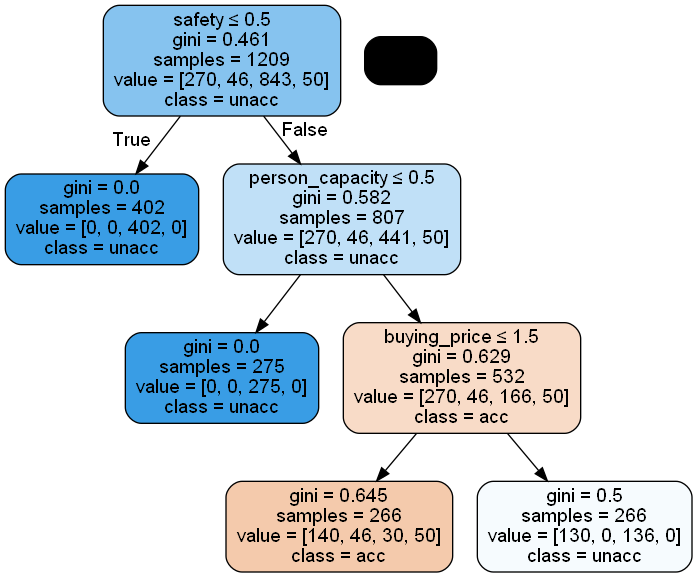

In [155]:
feature_cols = ['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot', 'safety']
dot_data = StringIO()
export_graphviz(DT_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=DT_classifier.classes_) # 'vgood', 'good'
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('car.png')
Image(graph.create_png())